**1) Load and Inspect the Data**

In [46]:
import pandas as pd

# Load the dataset
file_path = '/content/uber.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataframe
data.head()

key  fare_amount          pickup_datetime  pickup_longitude  \
0  52:06.0          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1  04:56.0          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2  45:00.0         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3  22:21.0          5.3  2009-06-26 08:22:21 UTC        -73.976124   
4  47:00.0         16.0  2014-08-28 17:47:00 UTC        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2        40.740770         -73.962565         40.772647                1  
3        40.790844         -73.965316         40.803349                3  
4        40.744085         -73.973082         40.761247                5

In [47]:
# Display dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [48]:
# Display basic statistics
data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967153        40.767158         -73.963659   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

**2) Data Preprocessing**

In [49]:
# Check for missing values
print(data.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [51]:
#'pickup_datetime' needs to be converted to datetime type
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [52]:
#Handling Rows with Zero Coordinates
data = data[~(
    ((data['pickup_longitude'] == 0) & (data['pickup_latitude'] == 0)) |
    ((data['dropoff_longitude'] == 0) & (data['dropoff_latitude'] == 0))
)]


data

key  fare_amount           pickup_datetime  pickup_longitude  \
0       52:06.0          7.5 2015-05-07 19:52:06+00:00        -73.999817   
1       04:56.0          7.7 2009-07-17 20:04:56+00:00        -73.994355   
2       45:00.0         12.9 2009-08-24 21:45:00+00:00        -74.005043   
3       22:21.0          5.3 2009-06-26 08:22:21+00:00        -73.976124   
4       47:00.0         16.0 2014-08-28 17:47:00+00:00        -73.925023   
...         ...          ...                       ...               ...   
199995  49:00.0          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996  09:00.0          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997  42:00.0         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998  56:25.0         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999  08:00.0         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0             40.738354         -73.999512         40.723217                1  
1             40.728225         -73.994710         40.750325                1  
2             40.740770         -73.962565         40.772647                1  
3             40.790844         -73.965316         40.803349                3  
4             40.744085         -73.973082         40.761247                5  
...                 ...                ...               ...              ...  
199995        40.739367         -73.986525         40.740297                1  
199996        40.736837         -74.006672         40.739620                1  
199997        40.756487         -73.858957         40.692588                2  
199998        40.725452         -73.983215         40.695416                1  
199999        40.720077         -73.985508         40.768793                1  

[196052 rows x 8 columns]

In [53]:
# Identify and display problematic latitude and longitude entries
problematic = data[(data['pickup_latitude'] < -90) | (data['pickup_latitude'] > 90) |
                 (data['dropoff_latitude'] < -90) | (data['dropoff_latitude'] > 90) |
                 (data['pickup_longitude'] < -180) | (data['pickup_longitude'] > 180) |
                 (data['dropoff_longitude'] < -180) | (data['dropoff_longitude'] > 180)]
print(problematic[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

        pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
4949         -748.016667        40.739957         -74.003570         40.734192
32549         -74.016055        40.715155        -737.916665         40.697862
48506        -735.200000        40.770092         -73.980187         40.765530
56617         -73.960828       404.433332         -73.988357         40.769037
61793         -73.951385       401.066667         -73.982110         40.754117
75851       -1340.648410      1644.421482       -3356.666300        872.697628
91422          57.418457      1292.016128        1153.572603       -881.985513
103745       -736.216667        40.767035         -73.982377         40.725562
139447        -74.011042        40.709780         -73.983163        493.533332
144253       -768.550000        40.757812         -73.997040         40.740007
161652       -735.433332        40.740605         -74.006373         40.739607
199936       -736.400000        40.774307         -7

In [54]:
# removing problematic data
data = data[~data.index.isin(problematic.index)]
#Remove rows with NaN in any of these columns
data_cleaned = data.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

**3) Feature Engineering**

In [39]:
%pip install geopy

In [55]:
from geopy.distance import geodesic

# Explicitly copying the data after filtering to avoid SettingWithCopyWarning error
data_cleaned = data.dropna(subset=[
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]).copy()

# Define the function to calculate distances safely
def calculate_distance_safe(row):
    if pd.notna(row['pickup_latitude']) and pd.notna(row['pickup_longitude']) and \
       pd.notna(row['dropoff_latitude']) and pd.notna(row['dropoff_longitude']):
        pickup = (row['pickup_latitude'], row['pickup_longitude'])
        dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
        return geodesic(pickup, dropoff).miles
    else:
        return None

# Assigning the distance calculation to the new column
data_cleaned['trip_distance'] = data_cleaned.apply(calculate_distance_safe, axis=1)

In [56]:
# Calculate Q1, Q3 and IQR for fare_amount
Q1_fare = data_cleaned['fare_amount'].quantile(0.25)
Q3_fare = data_cleaned['fare_amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Calculate Q1, Q3 and IQR for trip_distance
Q1_distance = data_cleaned['trip_distance'].quantile(0.25)
Q3_distance = data_cleaned['trip_distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

# Define bounds for outliers
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

# Filter out outliers in fare_amount and trip_distance
data_cleaned = data_cleaned[(data_cleaned['fare_amount'] >= lower_bound_fare) & (data_cleaned['fare_amount'] <= upper_bound_fare) &
                     (data_cleaned['trip_distance'] >= lower_bound_distance) & (data_cleaned['trip_distance'] <= upper_bound_distance)]

This code removes rows where either the pickup or dropoff coordinates are exactly zero for both latitude and longitude. This effectively filters out data points that are highly likely to be errors or default entries where no valid GPS data was received or recorded.

The between(-0.5, 0.5) function filters out longitudes that are very close to zero but not precisely zero, under the assumption that these are also likely to be errors (since legitimate coordinates for places in the Western Hemisphere, particularly in the United States, are significantly negative). This filter ensures that any slight deviations near zero that are not exactly zero are also excluded.

In [57]:
# Filter out entries with zero coordinates that are likely errors
data_cleaned = data_cleaned[~((data_cleaned['pickup_longitude'] == 0) & (data_cleaned['pickup_latitude'] == 0))]
data_cleaned = data_cleaned[~((data_cleaned['dropoff_longitude'] == 0) & (data_cleaned['dropoff_latitude'] == 0))]

# Also, consider removing or examining entries where coordinates are near zero
data_cleaned = data_cleaned[~((data_cleaned['pickup_longitude'].between(-0.5, 0.5)) & (data_cleaned['pickup_longitude'] != 0))]
data_cleaned = data_cleaned[~((data_cleaned['dropoff_longitude'].between(-0.5, 0.5)) & (data_cleaned['dropoff_longitude'] != 0))]


In [58]:
# Remove entries with incorrect geographic coordinates
data_cleaned = data_cleaned[
    (data_cleaned['pickup_longitude'].between(-74.2591, -73.7004)) &
    (data_cleaned['pickup_latitude'].between(40.4774, 40.9176)) &
    (data_cleaned['dropoff_longitude'].between(-74.2591, -73.7004)) &
    (data_cleaned['dropoff_latitude'].between(40.4774, 40.9176))
]
data_cleaned = data_cleaned[data_cleaned['fare_amount'] >= 0]
# Exclude high fares that are confirmed as anomalies or special cases
data_cleaned = data_cleaned[~data_cleaned['fare_amount'].isin([220.0, 499.0])]

# Recalculate trip distances after cleaning the coordinates
data_cleaned['trip_distance'] = data_cleaned.apply(calculate_distance_safe, axis=1)


In [59]:
# Recalculate descriptive statistics post removal of high fare anomalies
data_cleaned[['fare_amount', 'trip_distance']].describe()

fare_amount  trip_distance
count  175931.000000  175931.000000
mean        8.783745       1.489192
std         3.960178       1.007585
min         0.000000       0.000000
25%         5.700000       0.738526
50%         8.000000       1.218860
75%        11.000000       1.993598
max        22.200000       4.903302

**4) Descriptive Statistics and Visualization**

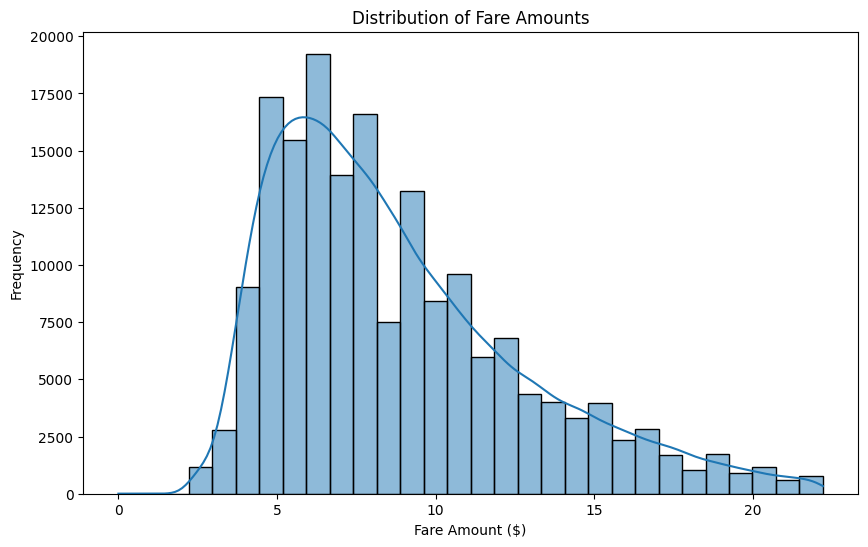

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of fare amounts
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()


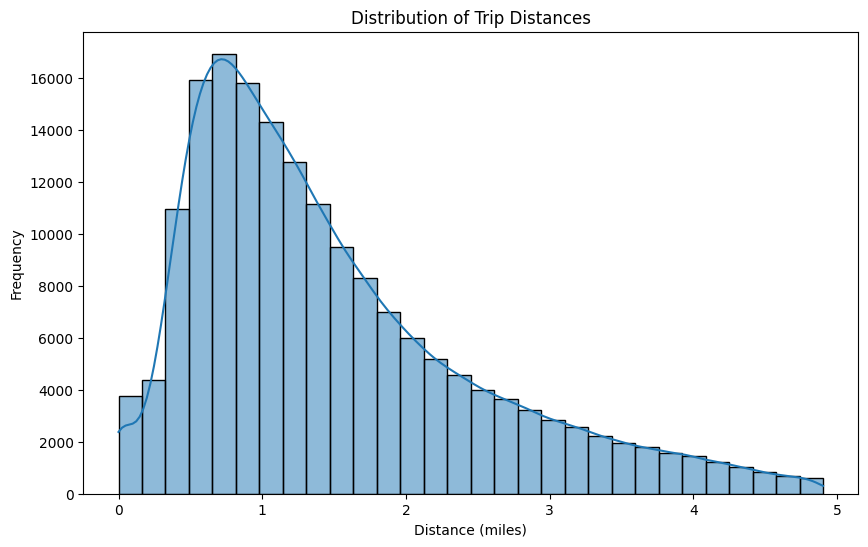

In [61]:
# Histogram of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['trip_distance'].dropna(), bins=30, kde=True)  # Ensure to drop any NaNs
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

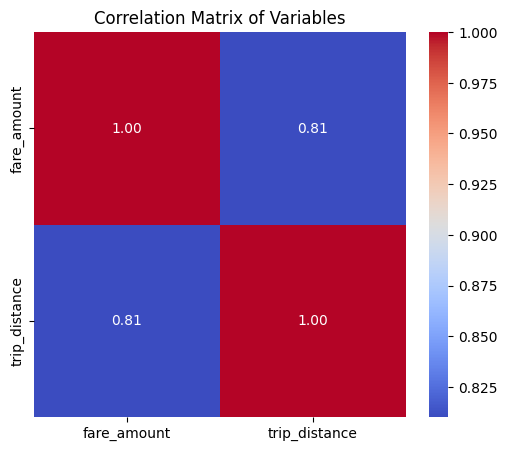

In [65]:
# Correlation matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(data_cleaned[['fare_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

**Model Selection and Training**\
->We'll compare several regression models to see which performs best:

* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Machine (GBM)

In [67]:
data_cleaned.columns


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance'],
      dtype='object')

In [68]:
# Convert 'pickup_datetime' to datetime if not already done
data_cleaned['pickup_datetime'] = pd.to_datetime(data_cleaned['pickup_datetime'])

# Extracting new temporal features
data_cleaned['hour_of_day'] = data_cleaned['pickup_datetime'].dt.hour
data_cleaned['day_of_week'] = data_cleaned['pickup_datetime'].dt.dayofweek
data_cleaned['month'] = data_cleaned['pickup_datetime'].dt.month
data_cleaned['year'] = data_cleaned['pickup_datetime'].dt.year

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.1.3

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.9.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

# Updating features for the model, excluding the original 'pickup_datetime'
X = data_cleaned[['trip_distance', 'passenger_count', 'hour_of_day', 'day_of_week', 'month', 'year',
                  'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = data_cleaned['fare_amount']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Training and predictions
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Display results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R-squared: {metrics['R-squared']:.2f}")


Linear Regression - MSE: 4.82, R-squared: 0.70
Decision Tree - MSE: 7.49, R-squared: 0.53
Random Forest - MSE: 3.62, R-squared: 0.77
Gradient Boosting - MSE: 3.96, R-squared: 0.75
XGBoost - MSE: 3.23, R-squared: 0.80
Ridge Regression - MSE: 4.82, R-squared: 0.70


In [71]:
import plotly.graph_objects as go

# Prepare data for plotting
model_names = list(results.keys())
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R-squared'] for metrics in results.values()]

# Create subplots
fig = go.Figure(data=[
    go.Bar(name='MSE', x=model_names, y=mse_values),
    go.Bar(name='R-squared', x=model_names, y=r2_values)
])

# Update layout
fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis_title='Score',
    barmode='group'
)

# Show plot
fig.show()

Using **Recursive Feature Elimination (RFE)** is a great approach to identify the most impactful features for your model. RFE works by recursively removing features, building a model using the remaining attributes, and calculating model accuracy. It helps in narrowing down to the most significant features that contribute to predicting the outcome.

In [72]:
# Initialize the model for RFE
model = XGBRegressor()

# Create RFECV object with KFold
rfecv = RFECV(estimator=model, step=1, cv=KFold(5), scoring='neg_mean_squared_error')

# Fit RFECV to the dataset
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

# Create Plotly figure
fig = go.Figure()

# Add trace for RFECV scores
fig.add_trace(go.Scatter(
    x=list(range(1, len(rfecv.grid_scores_) + 1)),
    y=rfecv.grid_scores_,
    mode='lines+markers',
    name='Cross-validation score'
))

# Update layout
fig.update_layout(
    title='RFECV Feature Selection',
    xaxis_title='Number of features selected',
    yaxis_title='Cross-validation score (neg MSE)',
    showlegend=True
)

# Show plot
fig.show()

# Display selected features
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)




Optimal number of features : 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



Selected features: Index(['trip_distance', 'hour_of_day', 'day_of_week', 'month', 'year',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')


**Neural Networks**\
Neural networks can be particularly useful if you have a large amount of data and non-linear relationships that simpler models can't capture effectively.

In [73]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training data and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model (reduced epochs, increased batch size)
history = model.fit(
    X_train_scaled, y_train, epochs=50, batch_size=32,
    validation_split=0.2, verbose=1,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# Load the best model saved by ModelCheckpoint
model.load_weights('best_model.h5')

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE: {test_loss}, Test MAE: {test_mae}")

# Plotting with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=history.history['loss'],
    name='Training Loss'
))

fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    name='Validation Loss'
))

fig.update_layout(
    title='Model Training History',
    xaxis_title='Epoch',
    yaxis_title='Loss'
)

fig.show()



Epoch 1/50
3519/3519 [==============================] - 16s 4ms/step - loss: 11.2442 - mae: 2.3547 - val_loss: 4.2868 - val_mae: 1.3976 - lr: 0.0010
Epoch 2/50
  52/3519 [..............................] - ETA: 10s - loss: 5.7355 - mae: 1.7252

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



3519/3519 [==============================] - 15s 4ms/step - loss: 5.3744 - mae: 1.6672 - val_loss: 4.0284 - val_mae: 1.3921 - lr: 0.0010
Epoch 3/50
3519/3519 [==============================] - 17s 5ms/step - loss: 5.1393 - mae: 1.6195 - val_loss: 3.9486 - val_mae: 1.3422 - lr: 0.0010
Epoch 4/50
3519/3519 [==============================] - 14s 4ms/step - loss: 4.9756 - mae: 1.5885 - val_loss: 3.8531 - val_mae: 1.3253 - lr: 0.0010
Epoch 5/50
3519/3519 [==============================] - 14s 4ms/step - loss: 4.8878 - mae: 1.5735 - val_loss: 3.7817 - val_mae: 1.3183 - lr: 0.0010
Epoch 6/50
3519/3519 [==============================] - 13s 4ms/step - loss: 4.8303 - mae: 1.5610 - val_loss: 3.7125 - val_mae: 1.3017 - lr: 0.0010
Epoch 7/50
3519/3519 [==============================] - 14s 4ms/step - loss: 4.7275 - mae: 1.5406 - val_loss: 3.7105 - val_mae: 1.2980 - lr: 0.0010
Epoch 8/50
3519/3519 [==============================] - 13s 4ms/step - loss: 4.6728 - mae: 1.5305 - val_loss: 3.7390 - val_

**Evaluate Performance Using RMSE and R-squared**\
While you already have MSE and MAE, RMSE (Root Mean Squared Error) can be more intuitive as it is on the same scale as the target variable, and R-squared (Coefficient of Determination) tells how well the variations in your data are accounted for by the model.

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predicting using the trained model
predictions = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")


1100/1100 [==============================] - 2s 2ms/step
RMSE: 1.8467124235869585
R-squared: 0.7847229778368521


**Analysis of Cross-Validation Results**\
Loss and MAE: The MSE losses and MAE values are fairly consistent across all folds, which is a good sign. The slight variations are normal in cross-validation and show that the model's performance is robust across different data splits.

Average RMSE and R²:

RMSE (Root Mean Squared Error): An average RMSE of 1.8445 is quite low, indicating good predictive accuracy. RMSE values are particularly important in regression models as they give a sense of how much error the predictions are making in the same units as the target variable.
R² (R-squared): An average R² value of 0.7824 is very strong in most contexts. It means that approximately 78.24% of the variability in your dependent variable is explained by the model. R² is a key indicator of the model's effectiveness.

In [76]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initial XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validation MSE: {cv_mse:.2f}")

# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score (MSE):", -random_search.best_score_)

# Train the model with best parameters
best_xgb = XGBRegressor(**random_search.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions on test set
predictions = best_xgb.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Optimized XGBoost - MSE: {mse:.2f}, R-squared: {r2:.2f}")

# Feature importance
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_idx]

# Plot feature importance
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=feature_importance[sorted_idx],
    y=sorted_features,
    orientation='h'
))

fig.update_layout(
    title="Feature Importance",
    xaxis_title="Importance",
    yaxis_title="Features",
    height=500 + len(feature_importance) * 20,
    width=800
)

fig.show()




Cross-validation MSE: 3.32


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best cross-validation score (MSE): 3.2496085273810933
Optimized XGBoost - MSE: 3.18, R-squared: 0.80


**What These Results Mean**\
Model Performance: Your model is performing well in terms of both RMSE and R² across multiple subsets of data, suggesting it is well-tuned and effectively capturing the underlying patterns without fitting to noise.

**Generalization:** The consistent performance across multiple folds, without significant variations in loss or accuracy, suggests that the model should generalize well to other unseen data, assuming it is similarly distributed to your current dataset.

In [77]:
# Assuming 'predictions' and 'y_test' are your model's predicted values and actual values, respectively.
# Convert them into a DataFrame first if they aren't already.
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

# Sample 10% of the data
df_sampled = df_results.sample(frac=0.1, random_state=42)

# Create a scatter plot for actual vs predicted values using sampled data
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_sampled['Actual'],
    y=df_sampled['Predicted'],
    mode='markers',
    marker=dict(color='blue', size=5, opacity=0.5)
))

# Adding line for perfect predictions
fig.add_trace(go.Scatter(
    x=[df_sampled['Actual'].min(), df_sampled['Actual'].max()],
    y=[df_sampled['Actual'].min(), df_sampled['Actual'].max()],
    mode='lines',
    line=dict(color='red', width=2, dash='dash')
))

# Update layout for clarity
fig.update_layout(
    title='Sampled Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=False
)

# Show the plot
fig.show()



Comparing the performance of different models and discussing their strengths and limitations in the context of the Uber fare prediction task.
Interpretation of Results:

*XGBoost:

Best performing model with MSE of 3.23 and R-squared of 0.80
Strengths: Handles non-linear relationships well, robust to outliers, good at capturing complex patterns
Limitations: Can be prone to overfitting if not properly tuned, less interpretable than simpler models


*Neural Network:

Second-best performer with MSE of 3.41
Strengths: Capable of capturing complex non-linear relationships, good at handling large datasets
Limitations: Requires more data to perform well, less interpretable, sensitive to hyperparameter tuning


*Random Forest:

Third-best with MSE of 3.62 and R-squared of 0.77
Strengths: Good at handling non-linear relationships, robust to outliers, provides feature importance
Limitations: Less interpretable than linear models, can be computationally intensive for large datasets


*Gradient Boosting:

Fourth-best with MSE of 3.96 and R-squared of 0.75
Strengths: Handles non-linear relationships well, often performs well with minimal tuning
Limitations: Can be prone to overfitting, less interpretable than simpler models


*Linear Regression and Ridge Regression:

Both have MSE of 4.82 and R-squared of 0.70
Strengths: Highly interpretable, computationally efficient, work well when relationships are linear
Limitations: Cannot capture non-linear relationships, sensitive to outliers
Note: Ridge Regression didn't improve upon Linear Regression, suggesting multicollinearity might not be a significant issue in this dataset


*Decision Tree:

Worst performing with MSE of 7.49 and R-squared of 0.53
Strengths: Easy to interpret, handles non-linear relationships
Limitations: Prone to overfitting, less stable (small changes in data can lead to large changes in the tree structure)



Comparison and Discussion:

Model Performance:\
XGBoost and Neural Network significantly outperform other models, suggesting that the relationship between features and fare prices is complex and non-linear. These models' ability to capture intricate patterns in the data makes them well-suited for this prediction task.\
Complexity vs. Interpretability:\
There's a clear trade-off between model complexity and interpretability. While XGBoost and Neural Networks perform best, they are less interpretable than Linear Regression or Decision Trees. For a business application like Uber fare prediction, the improved accuracy might justify the loss in interpretability.\
Robustness:\
Ensemble methods (Random Forest, Gradient Boosting, XGBoost) show strong performance, indicating they're handling outliers and noise in the data well. This is particularly important for real-world data like Uber fares, which can have many factors influencing prices.\
Linear vs. Non-linear Models:\
The significant improvement of non-linear models (XGBoost, Neural Network, Random Forest) over Linear Regression suggests that the relationship between features and fare prices is not purely linear. This could be due to factors like surge pricing, traffic patterns, or complex interactions between distance and time.\
Overfitting Concerns:\
While complex models perform well, there's always a risk of overfitting. It would be important to validate these models on completely new data to ensure their performance generalizes well.
Feature Importance:
Models like Random Forest and XGBoost can provide insights into feature importance, which could be valuable for understanding key drivers of fare prices.

In the context of Uber fare prediction:

The superior performance of XGBoost and Neural Networks suggests that these models can capture the complex factors influencing fare prices, potentially including non-linear effects of distance, time of day, and location.
The strong performance of ensemble methods indicates they're handling the variability in fare prices well, which is crucial given the many factors that can influence ride costs.
While Linear Regression performs reasonably well, its limitations in capturing non-linear relationships make it less suitable for this task compared to more advanced models.
The poor performance of the Decision Tree suggests that a single tree is not sufficient to capture the complexity of fare pricing, but its ensemble counterparts (Random Forest, Gradient Boosting) perform much better.

In conclusion, for the Uber fare prediction task, XGBoost or Neural Networks would be recommended due to their superior performance. However, if interpretability is a key requirement, Random Forest could be a good compromise between performance and explainability. The choice would ultimately depend on the specific needs of the application, balancing factors like prediction accuracy, model interpretability, computational resources, and ease of deployment and maintenance.

In [78]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming data_cleaned is your DataFrame with 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', and 'dropoff_longitude'
coords = data_cleaned[['pickup_latitude', 'pickup_longitude']]
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
data_cleaned['pickup_cluster'] = kmeans.labels_

# You can do the same for dropoff data if needed
coords_dropoff = data_cleaned[['dropoff_latitude', 'dropoff_longitude']]
kmeans_dropoff = KMeans(n_clusters=10, random_state=42).fit(coords_dropoff)
data_cleaned['dropoff_cluster'] = kmeans_dropoff.labels_


In [79]:
# Display the cluster centers for pickups and dropoffs
pickup_centers = kmeans.cluster_centers_
dropoff_centers = kmeans_dropoff.cluster_centers_

print("Pickup Cluster Centers:")
print(pickup_centers)

print("\nDropoff Cluster Centers:")
print(dropoff_centers)


Pickup Cluster Centers:
[[ 40.7508649  -73.99106638]
 [ 40.71501172 -74.00778597]
 [ 40.79982977 -73.96096697]
 [ 40.65922836 -73.79104056]
 [ 40.77496608 -73.98168553]
 [ 40.75941873 -73.89001127]
 [ 40.75679523 -73.97358403]
 [ 40.73189649 -73.99333755]
 [ 40.69479125 -73.97155735]
 [ 40.77376573 -73.95578727]]

Dropoff Cluster Centers:
[[ 40.71006635 -74.00714338]
 [ 40.80750212 -73.95135459]
 [ 40.75671027 -73.97598312]
 [ 40.73019282 -73.99180229]
 [ 40.68699487 -73.80395297]
 [ 40.69586211 -73.95877895]
 [ 40.75745801 -73.90661068]
 [ 40.77391799 -73.95601336]
 [ 40.74950058 -73.99448017]
 [ 40.78060464 -73.9791139 ]]


In [85]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# Create a base map centered on the mean coordinates
center_lat = data_cleaned['pickup_latitude'].mean()
center_lon = data_cleaned['pickup_longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Create a color palette for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

# Add pickup clusters
for i, center in enumerate(pickup_centers):
    folium.CircleMarker(
        location=[center[0], center[1]],
        radius=5,
        popup=f'Pickup Cluster {i}',
        color=colors[i],
        fill=True,
        fillColor=colors[i]
    ).add_to(map)

# Add dropoff clusters
for i, center in enumerate(dropoff_centers):
    folium.CircleMarker(
        location=[center[0], center[1]],
        radius=5,
        popup=f'Dropoff Cluster {i}',
        color=colors[i],
        fill=True,
        fillColor=colors[i],
        fillOpacity=0.7
    ).add_to(map)

# Add a sample of data points (for performance reasons, we'll just use 1000 points)
sample_data = data_cleaned.sample(1000)

# Create separate marker clusters for pickups and dropoffs
pickup_markers = MarkerCluster(name="Pickup Points").add_to(map)
dropoff_markers = MarkerCluster(name="Dropoff Points").add_to(map)

for idx, row in sample_data.iterrows():
    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=2,
        popup=f'Pickup Cluster {row["pickup_cluster"]}',
        color=colors[row['pickup_cluster']],
        fill=True,
        fillColor=colors[row['pickup_cluster']]
    ).add_to(pickup_markers)

    folium.CircleMarker(
        location=[row['dropoff_latitude'], row['dropoff_longitude']],
        radius=2,
        popup=f'Dropoff Cluster {row["dropoff_cluster"]}',
        color=colors[row['dropoff_cluster']],
        fill=True,
        fillColor=colors[row['dropoff_cluster']],
        fillOpacity=0.7
    ).add_to(dropoff_markers)

# Add layer control
folium.LayerControl().add_to(map)

# Save the map
map.save("uber_clusters_map.html")

print("Map saved as uber_clusters_map.html")

Map saved as uber_clusters_map.html


1) The map is centered on the mean coordinates of the pickup locations.\
2) Larger circles represent cluster centers (solid for pickups semi-transparent for dropoffs).\
3) Smaller circles represent individual data points (a sample of 1000 for performance).\
4) Pickup and dropoff points are in separate layers that can be toggled on and off.\
5) Each point is color-coded according to its cluster.
Clicking on a point will show which cluster it belongs to.

In [86]:
map

Time-based Analysis:
Visualize how ride patterns change over time (hour of day, day of week, month).

In [87]:
import plotly.express as px
hourly_rides = data_cleaned.groupby('hour_of_day').size().reset_index(name='count')
fig = px.line(hourly_rides, x='hour_of_day', y='count', title='Rides by Hour of Day')
fig.show()

Fare Distribution by Cluster:
Analyze how fares vary across different pickup or dropoff clusters.

In [ ]:
fig = px.box(data_cleaned, x='pickup_cluster', y='fare_amount', title='Fare Distribution by Pickup Cluster')
fig.show()

In [ ]:
import plotly.graph_objects as go

data_cleaned['date'] = pd.to_datetime(data_cleaned['pickup_datetime']).dt.date

fig = go.Figure()

for date in data_cleaned['date'].unique():
    day_data = data_cleaned[data_cleaned['date'] == date]
    fig.add_trace(go.Scattermapbox(
        lat=day_data['pickup_latitude'],
        lon=day_data['pickup_longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(size=4),
        text=day_data['fare_amount'],
        name=str(date)
    ))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(lat=center_lat, lon=center_lon),
        zoom=10
    ),
    updatemenus=[dict(
        type="buttons",
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None])])]
)

fig.show()